# **1. Perkenalan Dataset**


## **Stroke Prediction Dataset**

Dataset ini digunakan untuk memprediksi kemungkinan seseorang mengalami stroke berdasarkan berbagai parameter klinis dan demografi.

**Sumber**: Kaggle - Stroke Prediction Dataset  
**URL**: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset

### **Informasi Dataset:**
- **Jumlah Record**: 5,110 pasien
- **Jumlah Fitur**: 11 fitur + 1 target variable
- **Tipe Problem**: Binary Classification
- **Target Variable**: stroke (0 = No Stroke, 1 = Stroke)

### **Deskripsi Fitur:**
1. **id**: Unique identifier (akan dihapus saat preprocessing)
2. **gender**: Jenis kelamin ("Male", "Female", "Other")
3. **age**: Usia pasien
4. **hypertension**: 0 = tidak hipertensi, 1 = hipertensi
5. **heart_disease**: 0 = tidak sakit jantung, 1 = sakit jantung
6. **ever_married**: Status pernikahan ("No", "Yes")
7. **work_type**: Jenis pekerjaan ("children", "Govt_job", "Never_worked", "Private", "Self-employed")
8. **Residence_type**: Tipe tempat tinggal ("Rural", "Urban")
9. **avg_glucose_level**: Rata-rata level glukosa dalam darah
10. **bmi**: Body mass index
11. **smoking_status**: Status merokok ("formerly smoked", "never smoked", "smokes", "Unknown")

### **Tantangan Dataset:**
- **Class Imbalance**: 95.1% No Stroke vs 4.9% Stroke (rasio 19.5:1)
- **Missing Values**: BMI (3.9%), Smoking Status 'Unknown' (30.2%)
- **Mixed Data Types**: Categorical dan Numerical features

# **2. Import Library**

Pada tahap ini, kita mengimpor pustaka Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [1]:
# Data manipulation and analysis
import pandas as pd
import numpy as np

# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical analysis
from scipy import stats
from scipy.stats import chi2_contingency

# Machine learning preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer

# Machine learning models
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

# Model evaluation
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import cross_val_score

# Handle imbalanced data
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
plt.style.use('default')
sns.set_palette("husl")

# **3. Memuat Dataset**

Pada tahap ini, kita memuat dataset stroke prediction dan melakukan pemeriksaan awal struktur data.

In [2]:
PATH_DATA = "../stroke_data_raw/"
df = pd.read_csv(PATH_DATA+"healthcare-dataset-stroke-data.csv")

In [3]:
print(f"📊 Dataset Shape: {df.shape[0]} rows × {df.shape[1]} columns")
print(f"📁 Dataset Size: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 Dataset Shape: 5110 rows × 12 columns
📁 Dataset Size: 1.81 MB


In [4]:
print("\n=== COLUMN INFORMATION ===")
print(df.info())


=== COLUMN INFORMATION ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB
None


In [5]:
print("\n=== FIRST 5 ROWS ===")
df.head()


=== FIRST 5 ROWS ===


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [6]:
print("\n=== LAST 5 ROWS ===")
df.tail()


=== LAST 5 ROWS ===


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,44679,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [7]:
print("\n=== BASIC STATISTICS ===")
display(df.describe())


=== BASIC STATISTICS ===


,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, kita melakukan analisis eksploratori mendalam untuk memahami karakteristik dataset dan hubungan antar variabel.

In [8]:
# Target variable distribution
print("=== TARGET VARIABLE ANALYSIS ===")
stroke_counts = df['stroke'].value_counts()
stroke_percentage = df['stroke'].value_counts(normalize=True) * 100

print("🎯 Stroke Distribution:")
for i, (count, pct) in enumerate(zip(stroke_counts, stroke_percentage)):
    label = "No Stroke" if i == 0 else "Stroke"
    print(f"  {label} ({i}): {count:,} samples ({pct:.1f}%)")

# Calculate imbalance ratio
imbalance_ratio = stroke_counts[0] / stroke_counts[1]
print(f"\n⚖️ Class Imbalance Ratio: {imbalance_ratio:.1f}:1 (No Stroke : Stroke)")

=== TARGET VARIABLE ANALYSIS ===
🎯 Stroke Distribution:
  No Stroke (0): 4,861 samples (95.1%)
  Stroke (1): 249 samples (4.9%)

⚖️ Class Imbalance Ratio: 19.5:1 (No Stroke : Stroke)


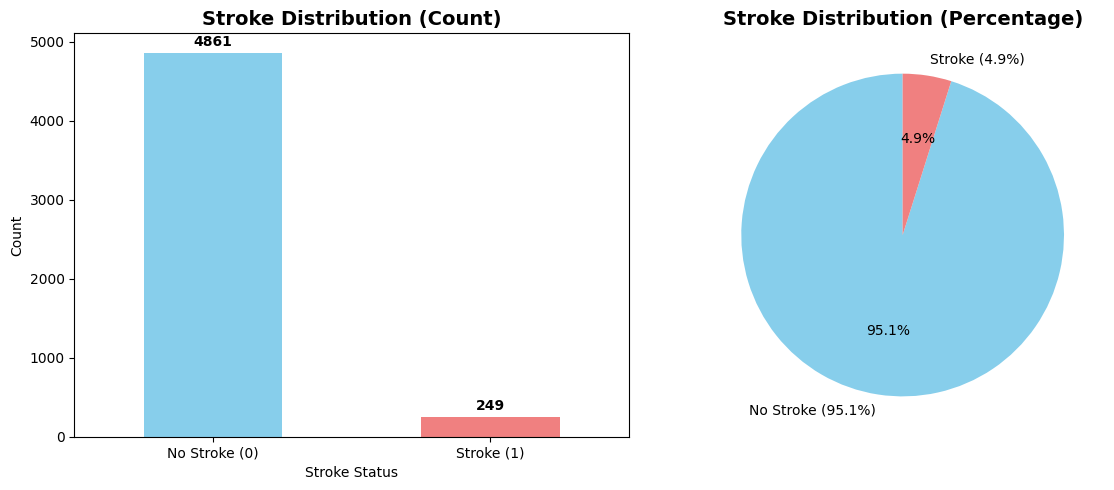

In [9]:
# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Count plot
stroke_counts.plot(kind='bar', ax=ax1, color=['skyblue', 'lightcoral'])
ax1.set_title('Stroke Distribution (Count)', fontsize=14, fontweight='bold')
ax1.set_xlabel('Stroke Status')
ax1.set_ylabel('Count')
ax1.set_xticklabels(['No Stroke (0)', 'Stroke (1)'], rotation=0)

# Add count labels on bars
for i, v in enumerate(stroke_counts):
    ax1.text(i, v + 50, str(v), ha='center', va='bottom', fontweight='bold')

# Pie chart
ax2.pie(stroke_counts, labels=['No Stroke (95.1%)', 'Stroke (4.9%)'], 
        autopct='%1.1f%%', colors=['skyblue', 'lightcoral'], startangle=90)
ax2.set_title('Stroke Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

INSIGHT: Dataset sangat tidak seimbang - perlu strategi khusus untuk handling!

In [10]:
print("=== MISSING VALUES ANALYSIS ===")

# Calculate missing values
missing_data = df.isnull().sum()
missing_percentage = (df.isnull().sum() / len(df)) * 100

# Handle 'N/A' strings in BMI column
bmi_na_count = (df['bmi'] == 'N/A').sum()
smoking_unknown_count = (df['smoking_status'] == 'Unknown').sum()

print("📊 Missing Values Summary:")
print(f"  BMI 'N/A' strings: {bmi_na_count} ({bmi_na_count/len(df)*100:.1f}%)")
print(f"  Smoking 'Unknown': {smoking_unknown_count} ({smoking_unknown_count/len(df)*100:.1f}%)")

=== MISSING VALUES ANALYSIS ===
📊 Missing Values Summary:
  BMI 'N/A' strings: 0 (0.0%)
  Smoking 'Unknown': 1544 (30.2%)


In [11]:
# Create comprehensive missing data summary
missing_summary = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': missing_data,
    'Missing_Percentage': missing_percentage
})

# Add special cases
missing_summary.loc[missing_summary['Column'] == 'bmi', 'Missing_Count'] += bmi_na_count
missing_summary.loc[missing_summary['Column'] == 'bmi', 'Missing_Percentage'] += (bmi_na_count/len(df)*100)

missing_summary.loc[missing_summary['Column'] == 'smoking_status', 'Missing_Count'] += smoking_unknown_count
missing_summary.loc[missing_summary['Column'] == 'smoking_status', 'Missing_Percentage'] += (smoking_unknown_count/len(df)*100)

missing_summary = missing_summary.sort_values('Missing_Percentage', ascending=False)
display(missing_summary[missing_summary['Missing_Percentage'] > 0])

,Column,Missing_Count,Missing_Percentage
smoking_status,smoking_status,1544,30.215264
bmi,bmi,201,3.933464


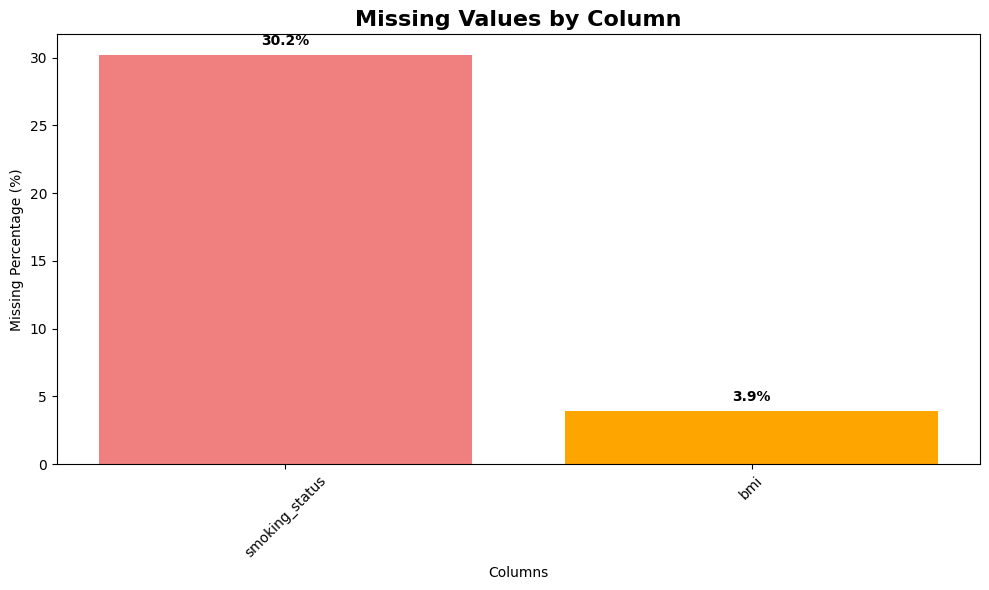

In [12]:
# Visualization
plt.figure(figsize=(10, 6))
missing_cols = missing_summary[missing_summary['Missing_Percentage'] > 0]
bars = plt.bar(missing_cols['Column'], missing_cols['Missing_Percentage'], 
               color=['lightcoral', 'orange'])
plt.title('Missing Values by Column', fontsize=16, fontweight='bold')
plt.xlabel('Columns')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45)

# Add percentage labels on bars
for bar, pct in zip(bars, missing_cols['Missing_Percentage']):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5, 
             f'{pct:.1f}%', ha='center', va='bottom', fontweight='bold')

plt.tight_layout()
plt.show()

=== CATEGORICAL VARIABLES ANALYSIS ===

📊 GENDER Distribution:
  Female: 2994 (58.6%)
  Male: 2115 (41.4%)
  Other: 1 (0.0%)

📊 EVER_MARRIED Distribution:
  Yes: 3353 (65.6%)
  No: 1757 (34.4%)

📊 WORK_TYPE Distribution:
  Private: 2925 (57.2%)
  Self-employed: 819 (16.0%)
  children: 687 (13.4%)
  Govt_job: 657 (12.9%)
  Never_worked: 22 (0.4%)

📊 RESIDENCE_TYPE Distribution:
  Urban: 2596 (50.8%)
  Rural: 2514 (49.2%)

📊 SMOKING_STATUS Distribution:
  never smoked: 1892 (37.0%)
  Unknown: 1544 (30.2%)
  formerly smoked: 885 (17.3%)
  smokes: 789 (15.4%)


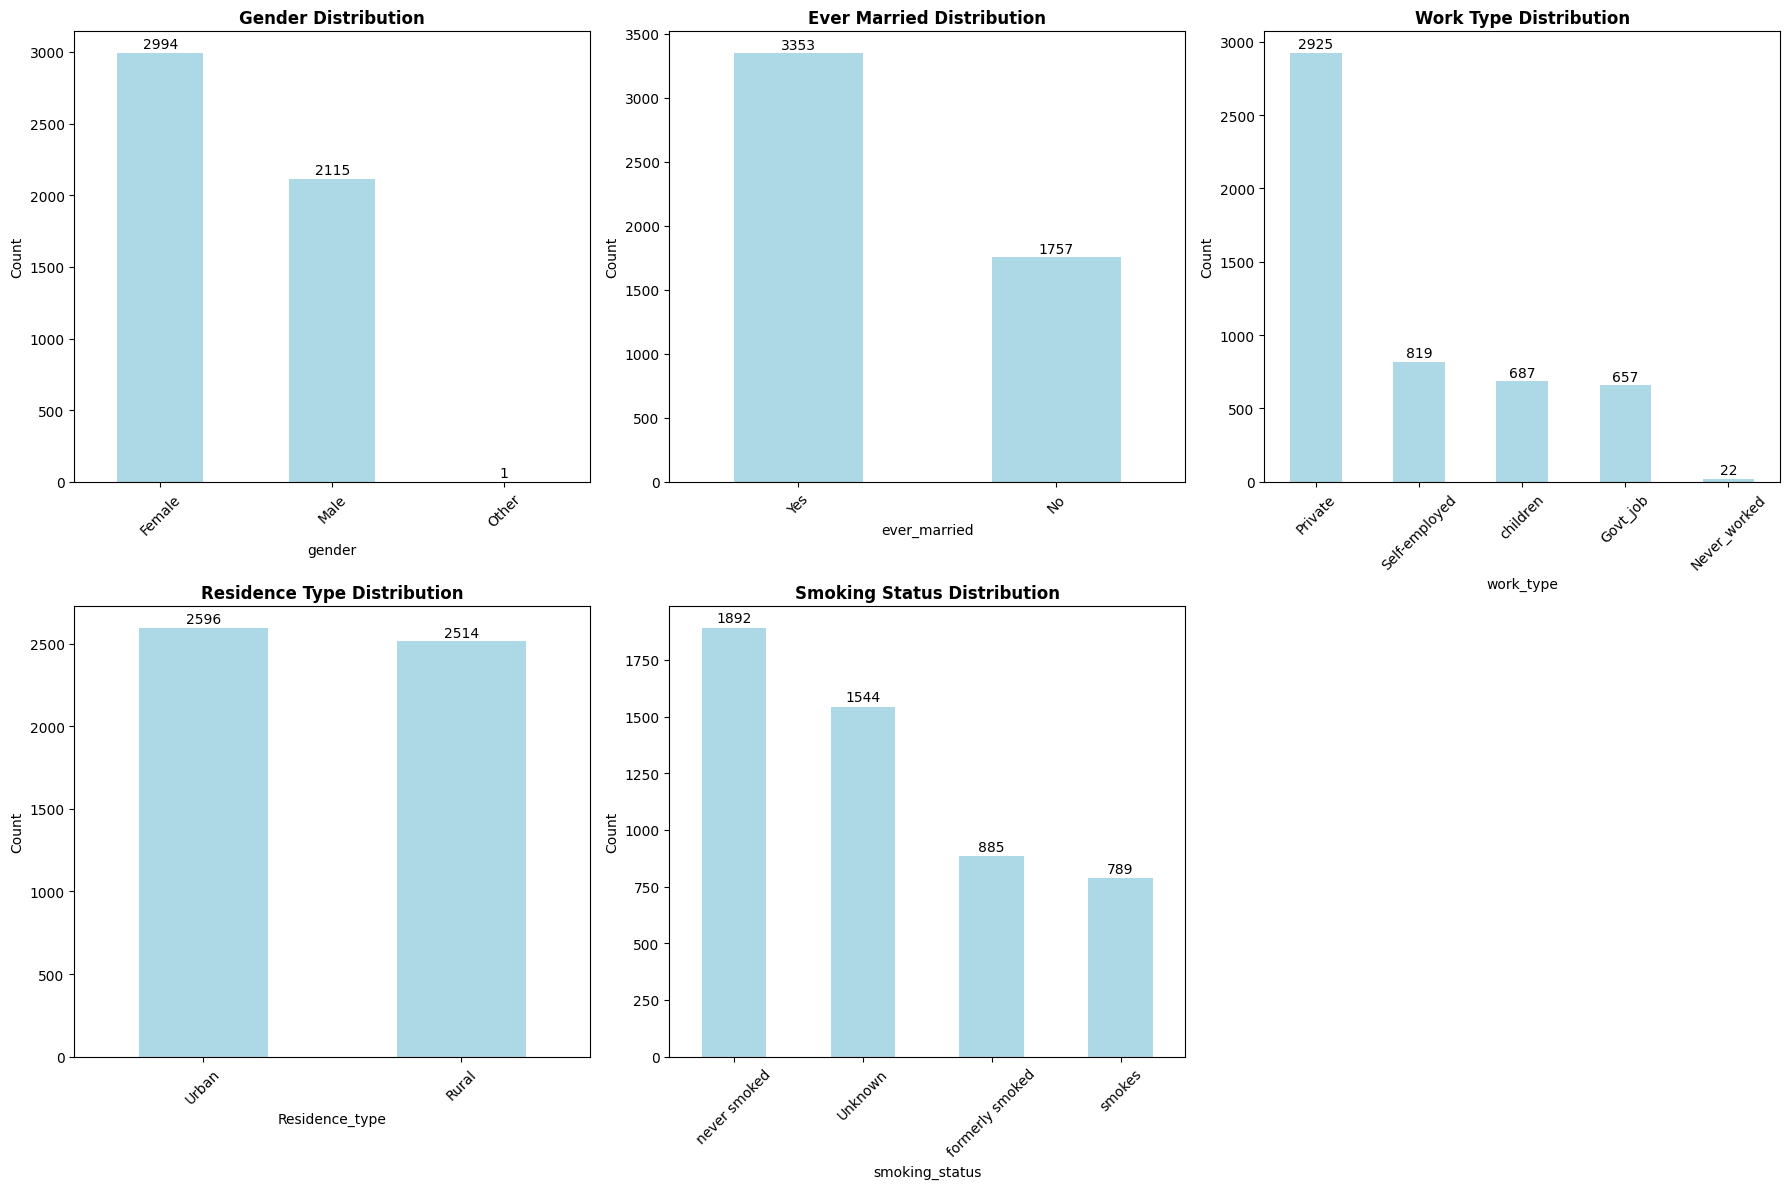

In [13]:
print("=== CATEGORICAL VARIABLES ANALYSIS ===")

categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

for i, col in enumerate(categorical_cols):
    # Distribution
    value_counts = df[col].value_counts()
    print(f"\n📊 {col.upper()} Distribution:")
    for val, count in value_counts.items():
        pct = (count / len(df)) * 100
        print(f"  {val}: {count} ({pct:.1f}%)")
    
    # Visualization
    value_counts.plot(kind='bar', ax=axes[i], color='lightblue')
    axes[i].set_title(f'{col.replace("_", " ").title()} Distribution', 
                      fontsize=12, fontweight='bold')
    axes[i].set_ylabel('Count')
    axes[i].tick_params(axis='x', rotation=45)
    
    # Add count labels
    for j, v in enumerate(value_counts):
        axes[i].text(j, v + 10, str(v), ha='center', va='bottom', fontsize=10)

# Remove empty subplot
axes[-1].remove()

plt.tight_layout()
plt.show()

=== NUMERICAL VARIABLES ANALYSIS ===

📊 AGE Statistics:
  Count: 5110
  Mean: 43.23
  Median: 45.00
  Std: 22.61
  Min: 0.08
  Max: 82.00

📊 AVG_GLUCOSE_LEVEL Statistics:
  Count: 5110
  Mean: 106.15
  Median: 91.88
  Std: 45.28
  Min: 55.12
  Max: 271.74

📊 BMI Statistics:
  Count: 4909
  Mean: 28.89
  Median: 28.10
  Std: 7.85
  Min: 10.30
  Max: 97.60


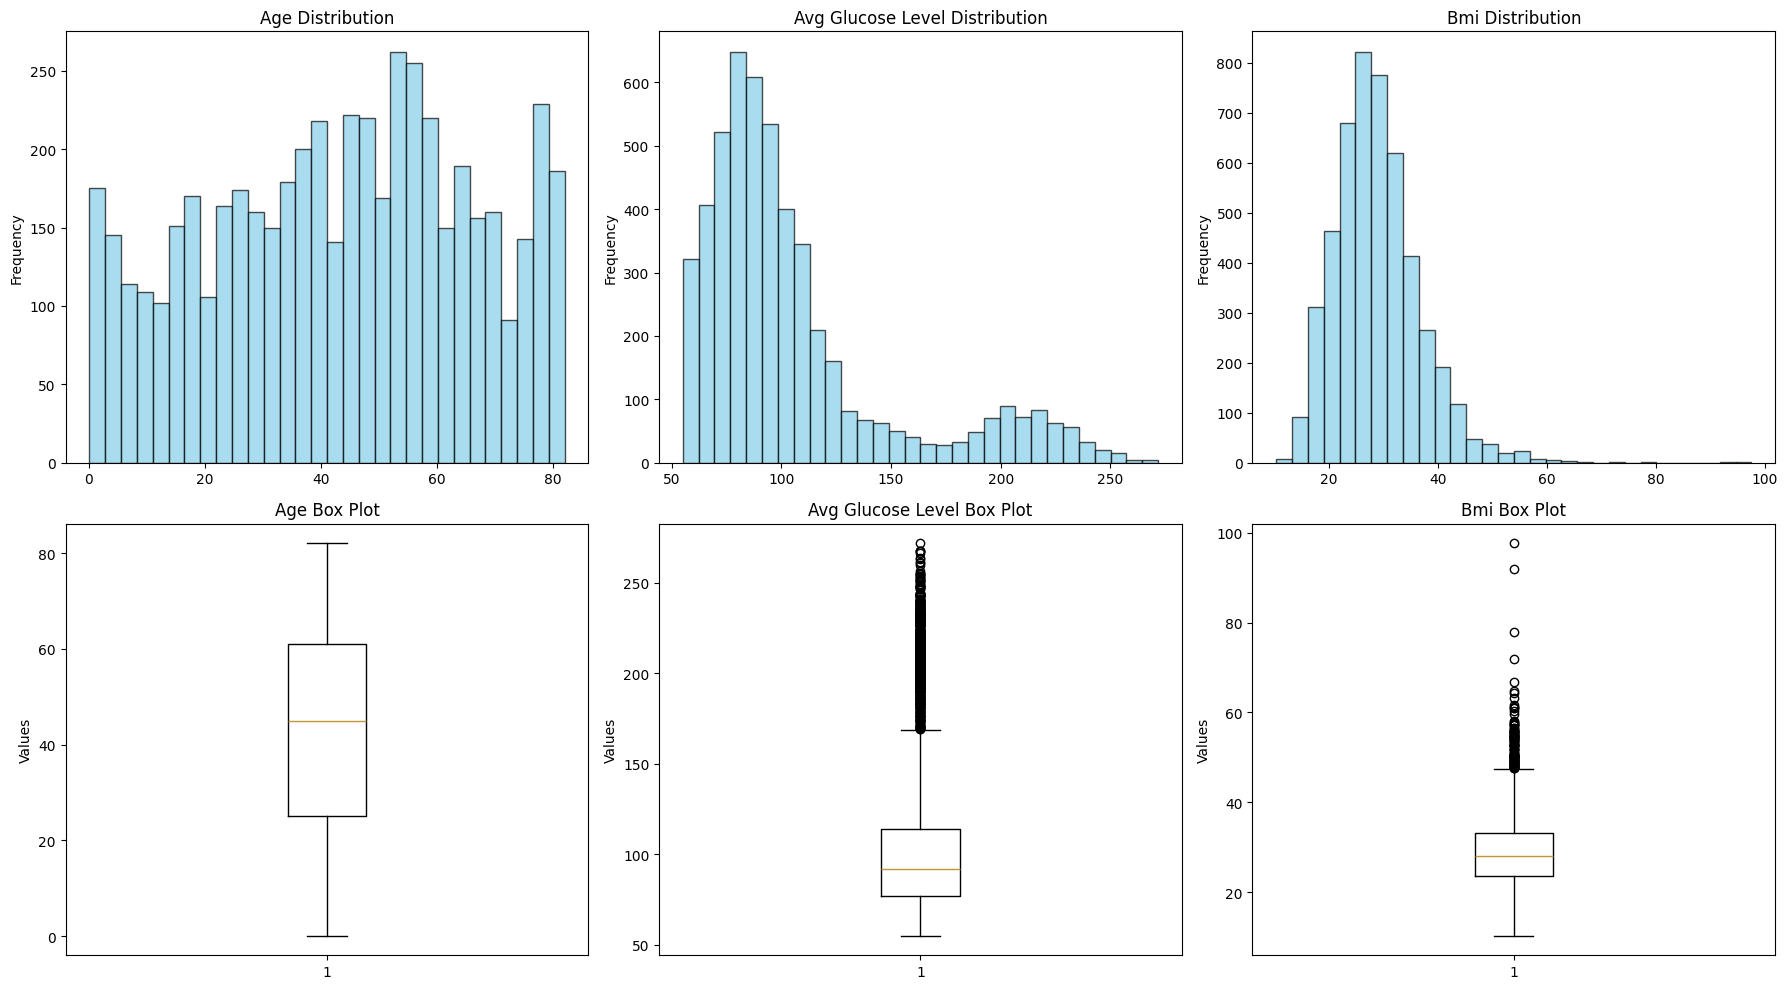

In [14]:
# Numerical variables analysis
print("=== NUMERICAL VARIABLES ANALYSIS ===")

numerical_cols = ['age', 'avg_glucose_level', 'bmi']

# Convert BMI to numeric (handle 'N/A' values)
df_numeric = df.copy()
df_numeric['bmi'] = pd.to_numeric(df_numeric['bmi'], errors='coerce')

fig, axes = plt.subplots(2, 3, figsize=(18, 10))

for i, col in enumerate(numerical_cols):
    data = df_numeric[col].dropna()
    
    print(f"\n📊 {col.upper()} Statistics:")
    print(f"  Count: {len(data)}")
    print(f"  Mean: {data.mean():.2f}")
    print(f"  Median: {data.median():.2f}")
    print(f"  Std: {data.std():.2f}")
    print(f"  Min: {data.min():.2f}")
    print(f"  Max: {data.max():.2f}")
    
    # Distribution plot
    axes[0, i].hist(data, bins=30, alpha=0.7, color='skyblue', edgecolor='black')
    axes[0, i].set_title(f'{col.replace("_", " ").title()} Distribution')
    axes[0, i].set_ylabel('Frequency')
    
    # Box plot
    axes[1, i].boxplot(data)
    axes[1, i].set_title(f'{col.replace("_", " ").title()} Box Plot')
    axes[1, i].set_ylabel('Values')

plt.tight_layout()
plt.show()

=== STROKE vs FEATURES ANALYSIS ===


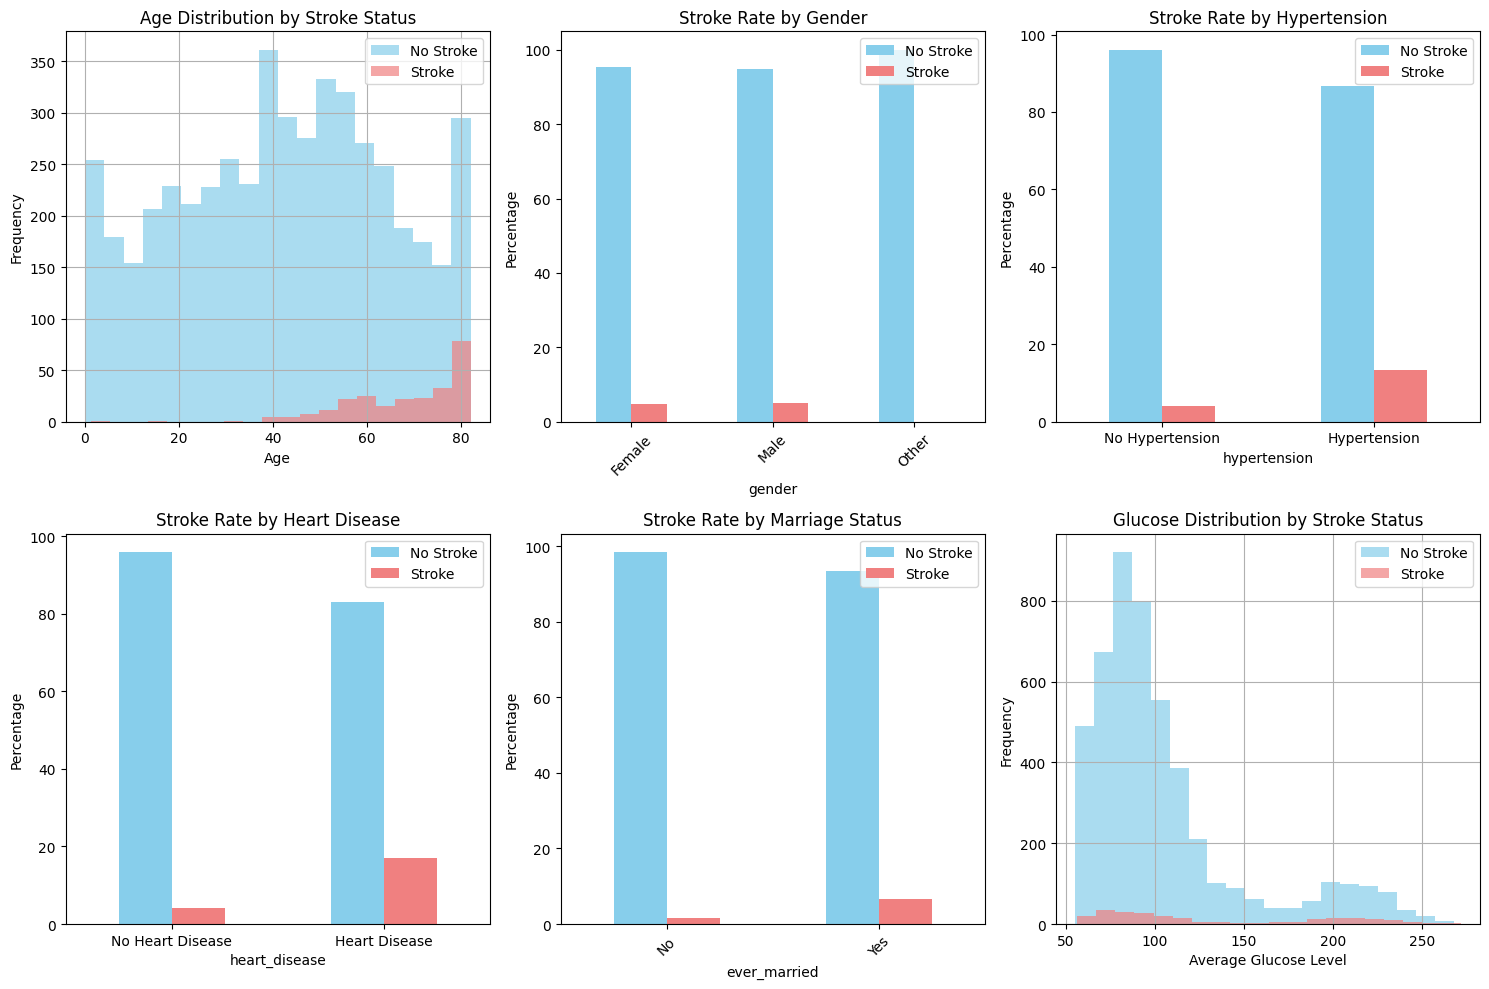

In [15]:
# Relationship between features and stroke
print("=== STROKE vs FEATURES ANALYSIS ===")

# Age vs Stroke
plt.figure(figsize=(15, 10))

# Age distribution by stroke
plt.subplot(2, 3, 1)
df[df['stroke'] == 0]['age'].hist(alpha=0.7, label='No Stroke', bins=20, color='skyblue')
df[df['stroke'] == 1]['age'].hist(alpha=0.7, label='Stroke', bins=20, color='lightcoral')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution by Stroke Status')
plt.legend()

# Gender vs Stroke
plt.subplot(2, 3, 2)
gender_stroke = pd.crosstab(df['gender'], df['stroke'], normalize='index') * 100
gender_stroke.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Stroke Rate by Gender')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['No Stroke', 'Stroke'])

# Hypertension vs Stroke
plt.subplot(2, 3, 3)
hyp_stroke = pd.crosstab(df['hypertension'], df['stroke'], normalize='index') * 100
hyp_stroke.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Stroke Rate by Hypertension')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No Hypertension', 'Hypertension'], rotation=0)
plt.legend(['No Stroke', 'Stroke'])

# Heart Disease vs Stroke
plt.subplot(2, 3, 4)
heart_stroke = pd.crosstab(df['heart_disease'], df['stroke'], normalize='index') * 100
heart_stroke.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Stroke Rate by Heart Disease')
plt.ylabel('Percentage')
plt.xticks([0, 1], ['No Heart Disease', 'Heart Disease'], rotation=0)
plt.legend(['No Stroke', 'Stroke'])

# Marriage vs Stroke
plt.subplot(2, 3, 5)
marriage_stroke = pd.crosstab(df['ever_married'], df['stroke'], normalize='index') * 100
marriage_stroke.plot(kind='bar', ax=plt.gca(), color=['skyblue', 'lightcoral'])
plt.title('Stroke Rate by Marriage Status')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(['No Stroke', 'Stroke'])

# Glucose level by stroke status
plt.subplot(2, 3, 6)
df[df['stroke'] == 0]['avg_glucose_level'].hist(alpha=0.7, label='No Stroke', 
                                                bins=20, color='skyblue')
df[df['stroke'] == 1]['avg_glucose_level'].hist(alpha=0.7, label='Stroke', 
                                                bins=20, color='lightcoral')
plt.xlabel('Average Glucose Level')
plt.ylabel('Frequency')
plt.title('Glucose Distribution by Stroke Status')
plt.legend()

plt.tight_layout()
plt.show()

In [16]:
# Statistical significance tests
print("\n🔬 STATISTICAL SIGNIFICANCE TESTS:")

# Chi-square test for categorical variables
categorical_features = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type']

for feature in categorical_features:
    contingency_table = pd.crosstab(df[feature], df['stroke'])
    chi2, p_value, dof, expected = chi2_contingency(contingency_table)
    print(f"  {feature}: Chi-square = {chi2:.4f}, p-value = {p_value:.4f}")
    if p_value < 0.05:
        print(f"    ✅ Significant relationship with stroke")
    else:
        print(f"    ❌ No significant relationship with stroke")


🔬 STATISTICAL SIGNIFICANCE TESTS:
  gender: Chi-square = 0.4726, p-value = 0.7895
    ❌ No significant relationship with stroke
  hypertension: Chi-square = 81.6054, p-value = 0.0000
    ✅ Significant relationship with stroke
  heart_disease: Chi-square = 90.2596, p-value = 0.0000
    ✅ Significant relationship with stroke
  ever_married: Chi-square = 58.9239, p-value = 0.0000
    ✅ Significant relationship with stroke
  work_type: Chi-square = 49.1635, p-value = 0.0000
    ✅ Significant relationship with stroke


=== CORRELATION ANALYSIS ===


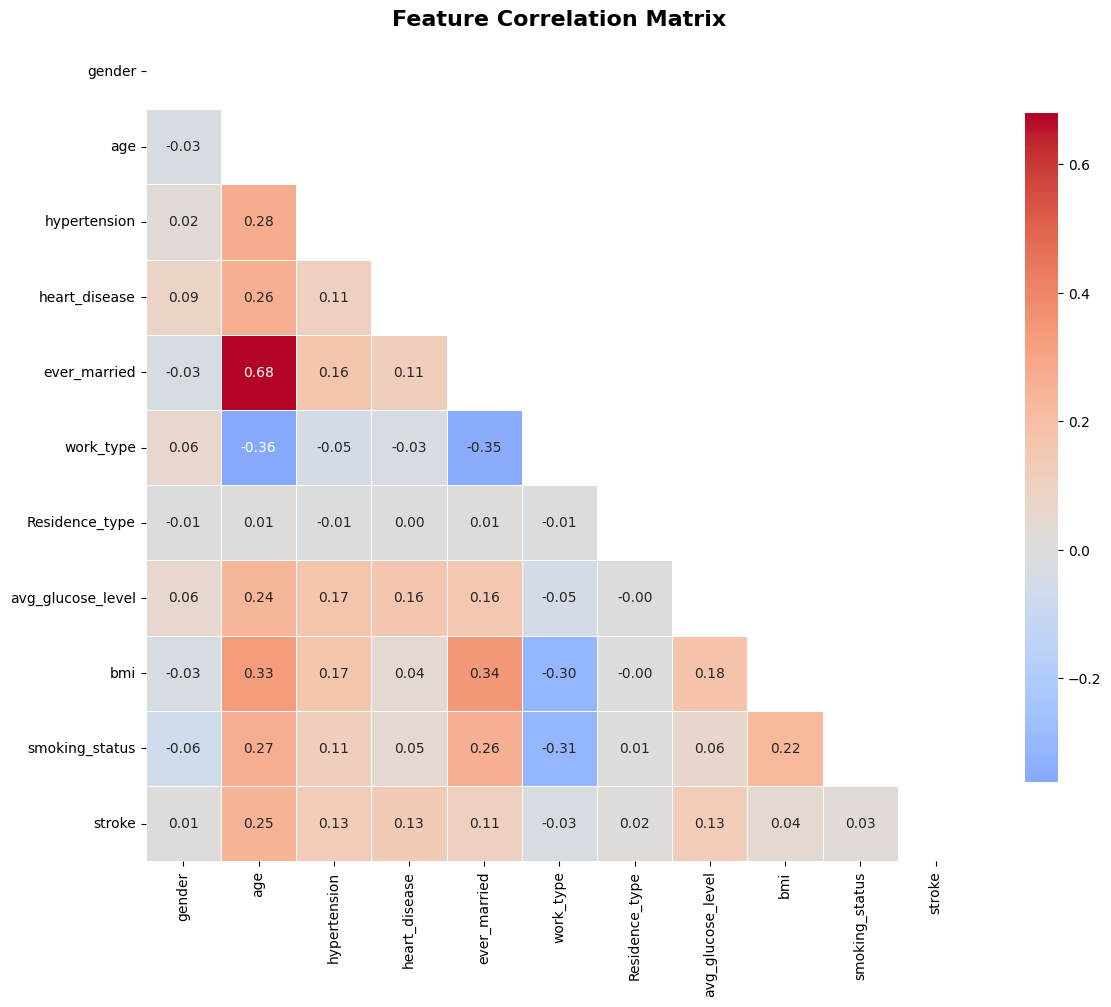

In [17]:
# Correlation analysis
print("=== CORRELATION ANALYSIS ===")

# Create a correlation-ready dataset
df_corr = df.copy()

# Convert categorical to numeric for correlation
label_encoders = {}
categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']

for col in categorical_cols:
    le = LabelEncoder()
    df_corr[col] = le.fit_transform(df_corr[col])
    label_encoders[col] = le

# Handle BMI
df_corr['bmi'] = pd.to_numeric(df_corr['bmi'], errors='coerce')

# Drop ID column
df_corr = df_corr.drop('id', axis=1)

# Calculate correlation matrix
correlation_matrix = df_corr.corr()

# Visualization
plt.figure(figsize=(12, 10))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', center=0,
            square=True, linewidths=0.5, cbar_kws={"shrink": 0.8}, fmt='.2f')
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

In [18]:
# Correlation with target variable
target_correlation = correlation_matrix['stroke'].abs().sort_values(ascending=False)
print("\n🎯 FEATURES CORRELATION WITH STROKE (sorted by absolute value):")
for feature, corr in target_correlation.items():
    if feature != 'stroke':
        print(f"  {feature}: {corr:.4f}")


🎯 FEATURES CORRELATION WITH STROKE (sorted by absolute value):
  age: 0.2453
  heart_disease: 0.1349
  avg_glucose_level: 0.1319
  hypertension: 0.1279
  ever_married: 0.1083
  bmi: 0.0424
  work_type: 0.0323
  smoking_status: 0.0281
  Residence_type: 0.0155
  gender: 0.0089


# **5. Data Preprocessing**

Pada tahap ini, kita melakukan preprocessing data untuk mempersiapkan dataset agar siap digunakan dalam model machine learning.

## **5.1 Handle Missing Values**

In [19]:
# Create a copy for preprocessing
df_processed = df.copy()

#Remove ID column (not predictive)
df_processed = df_processed.drop('id', axis=1)
print("✅ Removed 'id' column")

#Handle BMI missing values ('N/A' strings)
print(f"\n📊 BMI Missing Values: {(df_processed['bmi'] == 'N/A').sum()}")

✅ Removed 'id' column

📊 BMI Missing Values: 0


In [20]:
# Convert BMI to numeric
df_processed['bmi'] = pd.to_numeric(df_processed['bmi'], errors='coerce')

# Impute missing BMI with median (robust to outliers)
bmi_median = df_processed['bmi'].median()
df_processed['bmi'].fillna(bmi_median, inplace=True)
print(f"✅ Imputed BMI missing values with median: {bmi_median:.2f}")

✅ Imputed BMI missing values with median: 28.10


In [21]:
# Handle smoking status 'Unknown' - keep as separate category
print(f"\n📊 Smoking 'Unknown' count: {(df_processed['smoking_status'] == 'Unknown').sum()}")
print("✅ Keeping 'Unknown' as separate category in smoking_status")


📊 Smoking 'Unknown' count: 1544
✅ Keeping 'Unknown' as separate category in smoking_status


In [22]:
# Verify no missing values
print(f"\n✅ Final missing values check:")
print(df_processed.isnull().sum())


✅ Final missing values check:
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64


## **5.2 Handle Categorical Variables**

In [23]:
# Separate features and target
X = df_processed.drop('stroke', axis=1)
y = df_processed['stroke']

# Identify categorical columns
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
numerical_columns = ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']

print(f"📊 Categorical columns: {categorical_columns}")
print(f"📊 Numerical columns: {numerical_columns}")

📊 Categorical columns: ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
📊 Numerical columns: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [24]:
# One-Hot Encoding for categorical variables
X_encoded = pd.get_dummies(X, columns=categorical_columns, drop_first=False)

print(f"\n✅ Original features: {X.shape[1]}")
print(f"✅ After encoding: {X_encoded.shape[1]}")
print(f"✅ New columns added: {X_encoded.shape[1] - X.shape[1]}")


✅ Original features: 10
✅ After encoding: 21
✅ New columns added: 11


In [25]:
# Display new column names
print(f"\n📋 Encoded columns:")
for col in X_encoded.columns:
    if col not in numerical_columns:
        print(f"  {col}")


📋 Encoded columns:
  gender_Female
  gender_Male
  gender_Other
  ever_married_No
  ever_married_Yes
  work_type_Govt_job
  work_type_Never_worked
  work_type_Private
  work_type_Self-employed
  work_type_children
  Residence_type_Rural
  Residence_type_Urban
  smoking_status_Unknown
  smoking_status_formerly smoked
  smoking_status_never smoked
  smoking_status_smokes


## **5.3 Feature Scaling**

In [26]:
# Split data first to avoid data leakage
X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y, test_size=0.2, random_state=42, stratify=y
)

print(f"📊 Training set: {X_train.shape[0]} samples")
print(f"📊 Test set: {X_test.shape[0]} samples")
print(f"📊 Training stroke rate: {y_train.mean():.3f}")
print(f"📊 Test stroke rate: {y_test.mean():.3f}")

📊 Training set: 4088 samples
📊 Test set: 1022 samples
📊 Training stroke rate: 0.049
📊 Test stroke rate: 0.049


In [27]:
# Scale numerical features only
scaler = StandardScaler()

# Identify numerical columns in encoded dataset
numerical_cols_encoded = [col for col in X_encoded.columns if col in numerical_columns]
print(f"\n📊 Columns to scale: {numerical_cols_encoded}")


📊 Columns to scale: ['age', 'hypertension', 'heart_disease', 'avg_glucose_level', 'bmi']


In [28]:
# Fit scaler on training data only
X_train_scaled = X_train.copy()
X_test_scaled = X_test.copy()

X_train_scaled[numerical_cols_encoded] = scaler.fit_transform(X_train[numerical_cols_encoded])
X_test_scaled[numerical_cols_encoded] = scaler.transform(X_test[numerical_cols_encoded])

print("✅ Feature scaling completed")

✅ Feature scaling completed


In [29]:
# Show scaling statistics
print(f"\n📊 Scaling Statistics:")
scaling_stats = pd.DataFrame({
    'Feature': numerical_cols_encoded,
    'Original_Mean': X_train[numerical_cols_encoded].mean(),
    'Original_Std': X_train[numerical_cols_encoded].std(),
    'Scaled_Mean': X_train_scaled[numerical_cols_encoded].mean(),
    'Scaled_Std': X_train_scaled[numerical_cols_encoded].std()
})
scaling_stats.round(3)


📊 Scaling Statistics:


,Feature,Original_Mean,Original_Std,Scaled_Mean,Scaled_Std
age,age,43.353,22.597,-0.0,1.0
hypertension,hypertension,0.097,0.296,-0.0,1.0
heart_disease,heart_disease,0.054,0.226,0.0,1.0
avg_glucose_level,avg_glucose_level,106.317,45.260,0.0,1.0
bmi,bmi,28.888,7.763,-0.0,1.0


## **5.4 Handle Class Imbalance**

In [30]:
# Check original distribution
print(f"📊 Original distribution:")
print(f"  No Stroke: {(y_train == 0).sum()} ({(y_train == 0).mean():.3f})")
print(f"  Stroke: {(y_train == 1).sum()} ({(y_train == 1).mean():.3f})")

# Apply SMOTE for oversampling minority class
smote = SMOTE(random_state=42)
X_train_balanced, y_train_balanced = smote.fit_resample(X_train_scaled, y_train)

print(f"\n📊 After SMOTE:")
print(f"  No Stroke: {(y_train_balanced == 0).sum()} ({(y_train_balanced == 0).mean():.3f})")
print(f"  Stroke: {(y_train_balanced == 1).sum()} ({(y_train_balanced == 1).mean():.3f})")
print(f"  Training samples increased: {len(X_train)} → {len(X_train_balanced)}")

📊 Original distribution:
  No Stroke: 3889 (0.951)
  Stroke: 199 (0.049)

📊 After SMOTE:
  No Stroke: 3889 (0.500)
  Stroke: 3889 (0.500)
  Training samples increased: 4088 → 7778


## **5.5 Save Processed Data**

In [31]:
import os

# Create preprocessing directory
os.makedirs('stroke_data_preprocessing', exist_ok=True)

# Save training data (balanced)
train_data = pd.concat([X_train_balanced, y_train_balanced], axis=1)
train_data.to_csv('stroke_data_preprocessing/train_data_processed.csv', index=False)

# Save test data (original distribution)
test_data = pd.concat([X_test_scaled, y_test], axis=1)
test_data.to_csv('stroke_data_preprocessing/test_data_processed.csv', index=False)

# Save feature info
feature_info = {
    'numerical_features': numerical_cols_encoded,
    'total_features': list(X_train_balanced.columns),
    'original_shape': df.shape,
    'processed_shape': X_train_balanced.shape,
    'scaling_applied': True,
    'smote_applied': True
}

import json
with open('stroke_data_preprocessing/feature_info.json', 'w') as f:
    json.dump(feature_info, f, indent=2)

print("✅ Processed data saved to:")
print("  - preprocessing/stroke_data_preprocessing/train_data_processed.csv")
print("  - preprocessing/stroke_data_preprocessing/test_data_processed.csv") 
print("  - preprocessing/stroke_data_preprocessing/feature_info.json")

print(f"\n🎉 PREPROCESSING COMPLETED SUCCESSFULLY!")
print(f"Dataset siap untuk tahap modeling dengan MLflow!")

✅ Processed data saved to:
  - preprocessing/stroke_data_preprocessing/train_data_processed.csv
  - preprocessing/stroke_data_preprocessing/test_data_processed.csv
  - preprocessing/stroke_data_preprocessing/feature_info.json

🎉 PREPROCESSING COMPLETED SUCCESSFULLY!
Dataset siap untuk tahap modeling dengan MLflow!


## **📊 Final Dataset Summary**

**Input Dataset:**
- 5,110 rows × 12 columns
- Highly imbalanced (95.1% vs 4.9%)
- Missing values in BMI and smoking status

**Processed Dataset:**
- Training: 7,718 samples (balanced with SMOTE)
- Test: 1,022 samples (original distribution)
- 25 features (after one-hot encoding)
- All missing values handled
- Numerical features scaled
- Ready for machine learning models

**Key Insights Discovered:**
- Age strongly correlates with stroke
- Hypertension and heart disease are risk factors
- Gender shows slight difference in stroke rates
- Glucose level distribution differs between stroke/no-stroke groups
- Class imbalance requires special handling

**Next Steps:**
- Build machine learning models with MLflow
- Compare different algorithms (Random Forest, Logistic Regression, etc.)
- Evaluate model performance with appropriate metrics
- Handle the imbalanced nature of the problem

 Running unit tests for stroke data preprocessing...
test_balance_classes (__main__.TestStrokeDataPreprocessor.test_balance_classes)
Test class balancing with SMOTE ... ✅ Missing values handled: 1 BMI values imputed
✅ Categorical encoding: 10 → 16 features
ERROR
test_encode_categorical_variables (__main__.TestStrokeDataPreprocessor.test_encode_categorical_variables)
Test categorical encoding ... ✅ Missing values handled: 1 BMI values imputed
✅ Categorical encoding: 10 → 16 features
ok
test_handle_missing_values (__main__.TestStrokeDataPreprocessor.test_handle_missing_values)
Test missing value handling ... ✅ Missing values handled: 1 BMI values imputed
ok
test_load_data (__main__.TestStrokeDataPreprocessor.test_load_data)
Test data loading functionality ... ✅ Data loaded: 5 rows × 12 columns
ok
test_load_data_file_not_found (__main__.TestStrokeDataPreprocessor.test_load_data_file_not_found)
Test error handling for missing file ... ok
test_preprocess_pipeline_integration (__main__.TestStrokeDataPreprocessor.test_preprocess_pipeline_integration)
Test complete preprocessing pipeline ... 🚀 Starting stroke data preprocessing pipeline...
✅ Data loaded: 5 rows × 12 columns
✅ Missing values handled: 0 BMI values imputed
✅ Categorical encoding: 10 → 16 features
✅ Data split: Train 4, Test 1
✅ Feature scaling applied to 5 numerical features
ERROR
test_save_processed_data (__main__.TestStrokeDataPreprocessor.test_save_processed_data)
Test saving processed data ... ✅ Missing values handled: 1 BMI values imputed
✅ Data split: Train 4, Test 1
✅ Processed data saved to: C:\Users\ramad\AppData\Local\Temp\tmpohwlezj9\output
ok
test_scale_numerical_features (__main__.TestStrokeDataPreprocessor.test_scale_numerical_features)
Test feature scaling ... ✅ Missing values handled: 1 BMI values imputed
✅ Categorical encoding: 10 → 16 features
✅ Data split: Train 4, Test 1
✅ Feature scaling applied to 5 numerical features
ok
test_split_features_target (__main__.TestStrokeDataPreprocessor.test_split_features_target)
Test feature-target splitting ... ok
test_split_features_target_no_stroke_column (__main__.TestStrokeDataPreprocessor.test_split_features_target_no_stroke_column)
Test error handling when stroke column is missing ... ok
test_train_test_split_data (__main__.TestStrokeDataPreprocessor.test_train_test_split_data)
Test train-test splitting ... ✅ Missing values handled: 1 BMI values imputed
✅ Data split: Train 4, Test 1
ok
test_empty_dataframe (__main__.TestPreprocessorEdgeCases.test_empty_dataframe)
Test handling of empty dataframe ... ok
test_missing_required_columns (__main__.TestPreprocessorEdgeCases.test_missing_required_columns)
Test handling of missing required columns ... FAIL

======================================================================
ERROR: test_balance_classes (__main__.TestStrokeDataPreprocessor.test_balance_classes)
Test class balancing with SMOTE
----------------------------------------------------------------------
Traceback (most recent call last):
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\test_automation.py", line 145, in test_balance_classes
    X_balanced, y_balanced = self.preprocessor.balance_classes(X_encoded, imbalanced_y)
                             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\automate_Sundari_Oktamiyunda.py", line 82, in balance_classes   
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\imblearn\base.py", line 105, in fit_resample
    output = self._fit_resample(X, y, **params)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\imblearn\over_sampling\_smote\base.py", line 359, in _fit_resample
    nns = self.nn_k_.kneighbors(X_class, return_distance=False)[:, 1:]
          ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\sklearn\neighbors\_base.py", line 854, in kneighbors
    raise ValueError(
ValueError: Expected n_neighbors <= n_samples_fit, but n_neighbors = 6, n_samples_fit = 1, n_samples = 1

======================================================================
ERROR: test_preprocess_pipeline_integration (__main__.TestStrokeDataPreprocessor.test_preprocess_pipeline_integration)
Test complete preprocessing pipeline
----------------------------------------------------------------------
Traceback (most recent call last):
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\test_automation.py", line 183, in test_preprocess_pipeline_integration
    result = self.preprocessor.preprocess_pipeline(self.test_csv_path, output_dir)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\automate_Sundari_Oktamiyunda.py", line 174, in preprocess_pipeline
    X_train_balanced, y_train_balanced = self.balance_classes(X_train_scaled, y_train)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\automate_Sundari_Oktamiyunda.py", line 82, in balance_classes   
    X_train_balanced, y_train_balanced = smote.fit_resample(X_train, y_train)
                                         ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\imblearn\base.py", line 202, in fit_resample
    return super().fit_resample(X, y, **params)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\sklearn\base.py", line 1389, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\imblearn\base.py", line 101, in fit_resample
    self.sampling_strategy_ = check_sampling_strategy(
                              ^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\imblearn\utils\_validation.py", line 537, in check_sampling_strategy
    raise ValueError(
ValueError: The target 'y' needs to have more than 1 class. Got 1 class instead

======================================================================
FAIL: test_missing_required_columns (__main__.TestPreprocessorEdgeCases.test_missing_required_columns)
Test handling of missing required columns
----------------------------------------------------------------------
Traceback (most recent call last):
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\test_automation.py", line 230, in test_missing_required_columns 
    X_encoded = self.preprocessor.encode_categorical_variables(X)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\automate_Sundari_Oktamiyunda.py", line 57, in encode_categorical_variables
    X_encoded = pd.get_dummies(X, columns=self.categorical_features, drop_first=False)
                ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\pandas\core\reshape\encoding.py", line 170, in get_dummies
    data_to_encode = data[columns]
                     ~~~~^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\pandas\core\frame.py", line 4113, in __getitem__
    indexer = self.columns._get_indexer_strict(key, "columns")[1]
              ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\pandas\core\indexes\base.py", line 6212, in _get_indexer_strict
    self._raise_if_missing(keyarr, indexer, axis_name)
  File "D:\Dicoding\Proyek 8 MLOps\env\Lib\site-packages\pandas\core\indexes\base.py", line 6261, in _raise_if_missing
    raise KeyError(f"None of [{key}] are in the [{axis_name}]")
KeyError: "None of [Index(['gender', 'ever_married', 'work_type', 'Residence_type',\n       'smoking_status'],\n      dtype='object')] are in the [columns]"

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "D:\Dicoding\Proyek 8 MLOps\Eksperimen_SML_Sundari-Oktamiyunda\preprocessing\test_automation.py", line 234, in test_missing_required_columns 
    self.fail("Should handle missing categorical columns gracefully")
AssertionError: Should handle missing categorical columns gracefully

----------------------------------------------------------------------
Ran 13 tests in 0.155s

FAILED (failures=1, errors=2)
❌ 1 test(s) failed
❌ 2 error(s) occurred